# Visualizaciones secundarias 
#### En este archivo se encuentran las visualizaciones que no resultaron relevantes para el análisis 

## Librerías

In [9]:
import pandas as pd
import os
from PIL import Image, ImageStat
import matplotlib.pyplot as plt
import seaborn as sns
import random
import geopandas as gpd





## Armado del dataset

In [6]:
df1 = pd.read_csv('layoutsWithTags.csv')
df2 = pd.read_csv('layout_mas.csv', encoding='latin1')
merged_df = pd.merge(df1, df2, on='layout_id')
directorio_clean_images = './clean_images'
cantidad_fotos = len([nombre for nombre in os.listdir(directorio_clean_images) if os.path.isfile(os.path.join(directorio_clean_images, nombre))])
print("La cantidad de fotos en la carpeta 'clean_images' es:", cantidad_fotos)
layouts_todo = merged_df
directorio = './clean_images'

filas = []

# Obtener una lista de todas las imágenes en el directorio
imagenes_en_directorio = [filename for filename in os.listdir(directorio)]

# Iterar sobre cada imagen en el directorio
for filename in imagenes_en_directorio:
    # Obtener el layout_id de la imagen a partir del nombre del archivo
    layout_id = int(filename.split('_')[0])
    
    # Buscar la información del diseño (layout) en layouts_todo que coincida con el layout_id
    layout_info = layouts_todo[layouts_todo['layout_id'] == layout_id].iloc[0]
    
    # Obtener información relevante del diseño (layout)
    country = layout_info['country_x']
    relevant = layout_info['relevant (new) tags']
    coincidencia = layout_info['coincidencia']
    field_name = layout_info['field_name']
    location = layout_info['location']
    latitude = layout_info['latitude']
    longitude = layout_info['longitude']
    flight_date = layout_info['flight_date']
    
    # Abrir la imagen y obtener su tamaño, brillo y saturación
    img = Image.open(os.path.join(directorio, filename))
    ancho, alto = img.size
    brillo = img.getextrema()[0][0]
    s, _, _ = img.convert('HSV').split()
    estadisticas_saturacion = ImageStat.Stat(s)
    saturacion = estadisticas_saturacion.mean[0]
    
    # Agregar la información a la lista de filas
    filas.append({
        'trial_id': layout_info['trial_id'],
        'layout_id': layout_id,
        'country': country,
        'relevant (new) tags': relevant,
        'coincidencia': coincidencia,
        'nombre_imagen': filename,
        'ancho': ancho,
        'alto': alto,
        'brillo': brillo,
        'tonalidad': 0,  # Se deja en 0 porque no se proporciona en el código original
        'saturacion': saturacion,
        'field_name': field_name,
        'location': location,
        'latitude': latitude,
        'longitude': longitude,
        'flight_date': flight_date
    })

# Crear el DataFrame nuevo_df2
nuevo_df2 = pd.DataFrame(filas)


La cantidad de fotos en la carpeta 'clean_images' es: 1978


## Mapa de distribución de países

C:\Users\nicky\AppData\Local\Temp\ipykernel_21000\2478104269.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


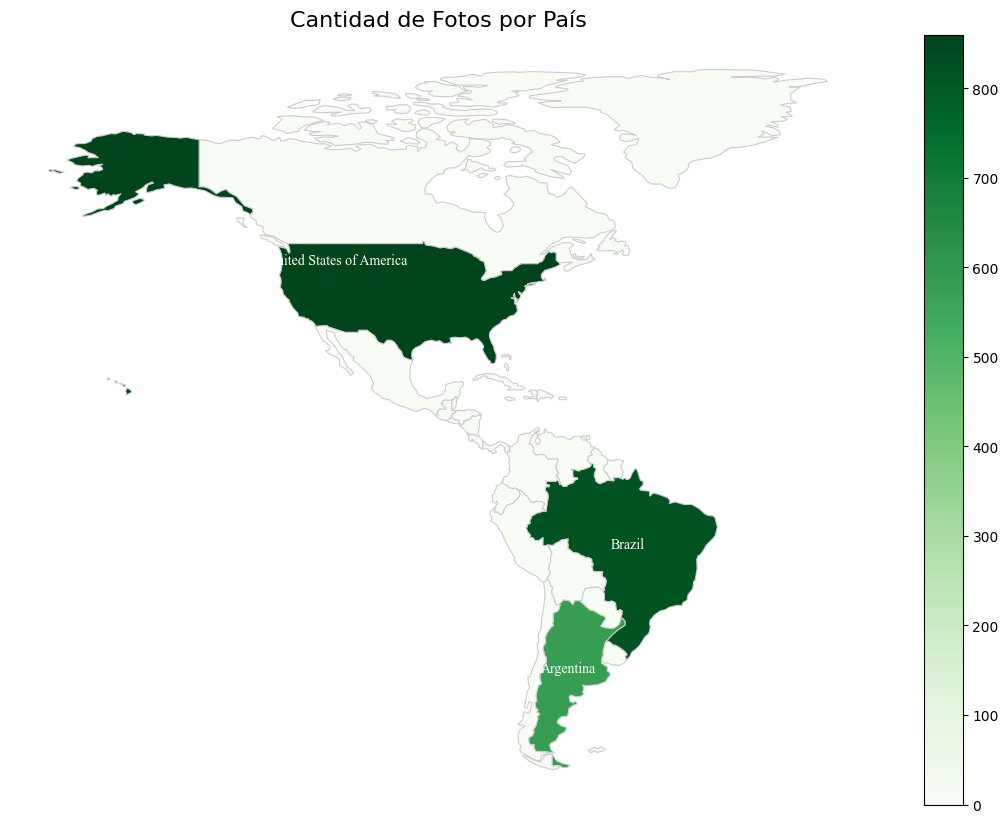

In [10]:

df = pd.read_csv('layoutsWithTags.csv')
df['country'] = df['country'].replace({'USA': 'United States of America'})
conteo_paises = df['country'].value_counts() * 20  # Multiplicar por 20
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_americas = world[(world['continent'] == 'North America') | (world['continent'] == 'South America')]
world_americas = world_americas.merge(conteo_paises, how='left', left_on='name', right_index=True)
world_americas[conteo_paises.name] = world_americas[conteo_paises.name].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_americas.plot(column=conteo_paises.name, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
for idx, row in world_americas.iterrows():
    if row[conteo_paises.name] > 0:
        plt.annotate(text=row['name'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), 
                     horizontalalignment='center', verticalalignment='center', fontsize=10, color='white', fontname='Times New Roman')
plt.title('Cantidad de Fotos por País', fontsize=16)
plt.axis('off')
plt.show()

# Dimensión de imágenes

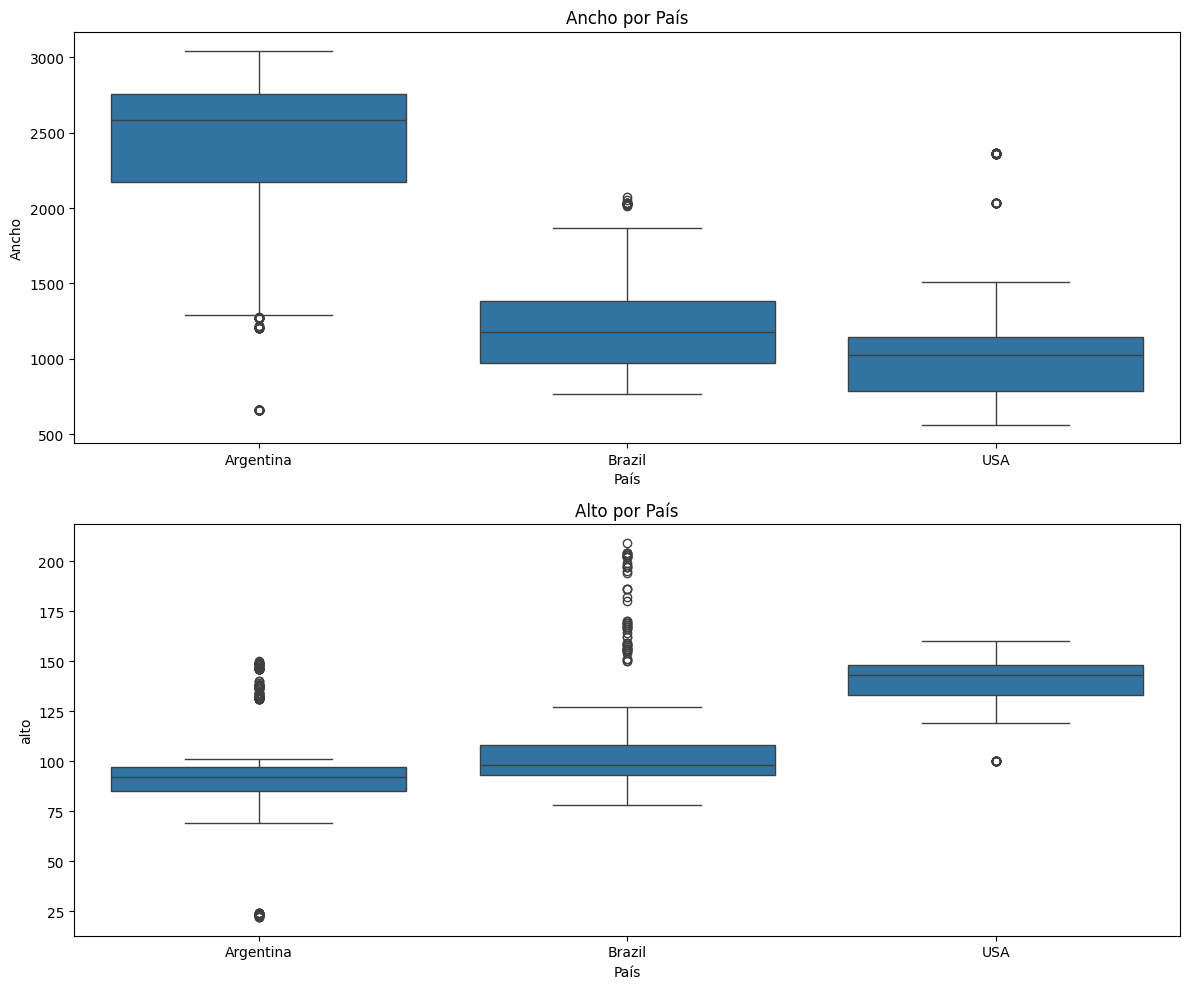

In [12]:
#Diagrama de caja y bigotes
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Para el ancho por país
sns.boxplot(x='country', y='ancho', data=nuevo_df2, ax=axes[0])
axes[0].set_title('Ancho por País')
axes[0].set_xlabel('País')
axes[0].set_ylabel('Ancho')

# Para el Alto por país
sns.boxplot(x='country', y='alto', data=nuevo_df2, ax=axes[1])
axes[1].set_title('Alto por País')
axes[1].set_xlabel('País')
axes[1].set_ylabel('alto')


plt.tight_layout()
plt.show()


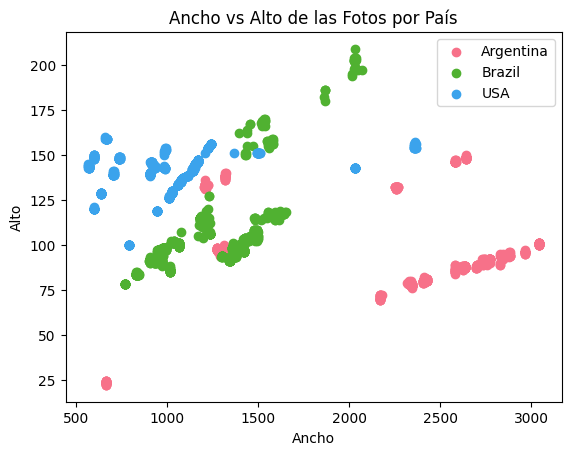

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#Scatter plot
palette = sns.color_palette("husl", len(nuevo_df2['country'].unique()))
fig, ax = plt.subplots()

for country, color in zip(nuevo_df2['country'].unique(), palette):
    df_country = nuevo_df2[nuevo_df2['country'] == country]
    ax.scatter(df_country['ancho'], df_country['alto'], label=country, color=color)

# Etiquetas y título
ax.set_xlabel('Ancho')
ax.set_ylabel('Alto')
ax.set_title('Ancho vs Alto de las Fotos por País')
ax.legend()

plt.show()

## Ancho por horario

C:\Users\nicky\AppData\Local\Temp\ipykernel_21000\2807437501.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='ancho', data=nuevo_df2, palette='husl')


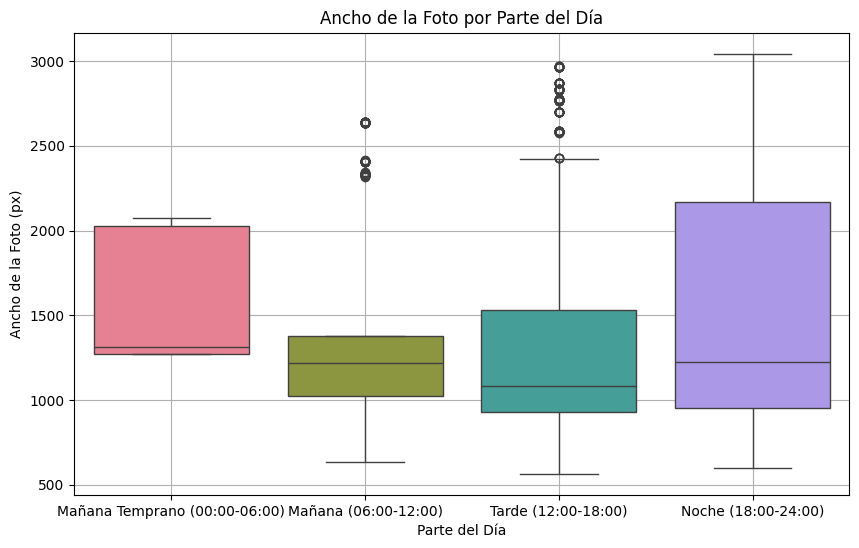

Resultados del test ANOVA:
Estadística F: 6.066507066583759
Valor p: 0.0004153388298305434
La media del ancho de la foto depende significativamente del horario del día (rechazamos la hipótesis nula).


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


nuevo_df2['flight_date'] = pd.to_datetime(nuevo_df2['flight_date'])
nuevo_df2['hour_of_day'] = nuevo_df2['flight_date'].dt.hour

nuevo_df2['time_of_day'] = pd.cut(nuevo_df2['hour_of_day'], bins=4, labels=['Mañana Temprano (00:00-06:00)', 'Mañana (06:00-12:00)', 'Tarde (12:00-18:00)', 'Noche (18:00-24:00)'])


plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_day', y='ancho', data=nuevo_df2, palette='husl')
plt.title('Ancho de la Foto por Parte del Día')
plt.xlabel('Parte del Día')
plt.ylabel('Ancho de la Foto (px)')
plt.grid(True)
plt.show()
from scipy.stats import f_oneway

resultados_anova = f_oneway(nuevo_df2[nuevo_df2['time_of_day'] == 'Mañana Temprano (00:00-06:00)']['ancho'],
                            nuevo_df2[nuevo_df2['time_of_day'] == 'Mañana (06:00-12:00)']['ancho'],
                            nuevo_df2[nuevo_df2['time_of_day'] == 'Tarde (12:00-18:00)']['ancho'],
                            nuevo_df2[nuevo_df2['time_of_day'] == 'Noche (18:00-24:00)']['ancho'])


print("Resultados del test ANOVA:")
print("Estadística F:", resultados_anova.statistic)
print("Valor p:", resultados_anova.pvalue)


alpha = 0.05
if resultados_anova.pvalue < alpha:
    print("La media del ancho de la foto depende significativamente del horario del día (rechazamos la hipótesis nula).")
else:
    print("No hay suficiente evidencia para concluir que la media del ancho de la foto depende del horario del día (no rechazamos la hipótesis nula).")



#### No se puede afirmar que haya relación teórica a pesar de la significancia estadística